# EDA

In [1]:
#### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
#### Let's import our data
data = pd.read_csv('../input/CryptocoinsHistoricalPrices.csv')

In [3]:
#### and test if everything OK
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,2017-11-12,6295.45,6625.05,5519.01,5950.07,"8,957,350,000","104,980,000,000",BTC,-0.054862
1,2,2017-11-11,6618.61,6873.15,6204.22,6357.60,"4,908,680,000","110,362,000,000",BTC,-0.039436
2,3,2017-11-10,7173.73,7312.00,6436.87,6618.14,"5,208,250,000","119,607,000,000",BTC,-0.077448
3,4,2017-11-09,7446.83,7446.83,7101.52,7143.58,"3,226,250,000","124,146,000,000",BTC,-0.040722
4,5,2017-11-08,7141.38,7776.42,7114.02,7459.69,"4,602,200,000","119,041,000,000",BTC,0.044573


In [4]:
#### rename the first column
data= data.rename(index=str, columns={"Unnamed: 0": "id"})
data.head()

,id,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,2017-11-12,6295.45,6625.05,5519.01,5950.07,"8,957,350,000","104,980,000,000",BTC,-0.054862
1,2,2017-11-11,6618.61,6873.15,6204.22,6357.60,"4,908,680,000","110,362,000,000",BTC,-0.039436
2,3,2017-11-10,7173.73,7312.00,6436.87,6618.14,"5,208,250,000","119,607,000,000",BTC,-0.077448
3,4,2017-11-09,7446.83,7446.83,7101.52,7143.58,"3,226,250,000","124,146,000,000",BTC,-0.040722
4,5,2017-11-08,7141.38,7776.42,7114.02,7459.69,"4,602,200,000","119,041,000,000",BTC,0.044573


In [5]:
#### check for NAs in sense Pandas understands them
data.isnull().sum()

id              0
Date            2
Open          289
High          306
Low           261
Close         287
Volume          0
Market.Cap      0
coin            0
Delta         303
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604174 entries, 0 to 604173
Data columns (total 10 columns):
id            604174 non-null int64
Date          604172 non-null object
Open          603885 non-null float64
High          603868 non-null float64
Low           603913 non-null float64
Close         603887 non-null float64
Volume        604174 non-null object
Market.Cap    604174 non-null object
coin          604174 non-null object
Delta         603871 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 50.7+ MB


In [7]:
data.describe()

,id,Open,High,Low,Close,Delta
count,604174.000000,6.038850e+05,6.038680e+05,6.039130e+05,6.038870e+05,603871.000000
mean,302087.500000,2.438514e+01,2.561176e+01,2.560826e+01,2.463035e+01,0.196498
std,174410.155106,8.231601e+02,8.212767e+02,9.424544e+02,8.333518e+02,60.154061
min,1.000000,1.000000e-10,1.300000e-10,9.200000e-14,1.000000e-10,-1.000000
25%,151044.250000,3.070000e-04,3.590000e-04,2.660000e-04,3.070000e-04,-0.064616
50%,302087.500000,4.693000e-03,5.446000e-03,4.093000e-03,4.696000e-03,0.000000
75%,453130.750000,6.231600e-02,7.157300e-02,5.475200e-02,6.239550e-02,0.060000
max,604174.000000,9.991780e+04,9.947900e+04,9.937920e+04,9.990380e+04,34513.333333


#### Notice, missing data exist !!!

In [8]:
### Now let's prepare lists of numeric, categorical and binary columns
### Assuming we wanted to predict the 'Close' Value
# All features
target = data['Close'].fillna(-1)
features = data.columns.tolist() 
features.remove('Close')

#### Now, some visualizations ???

In [9]:
### set plot size
plt.rcParams["figure.figsize"] = (18,9)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=10)

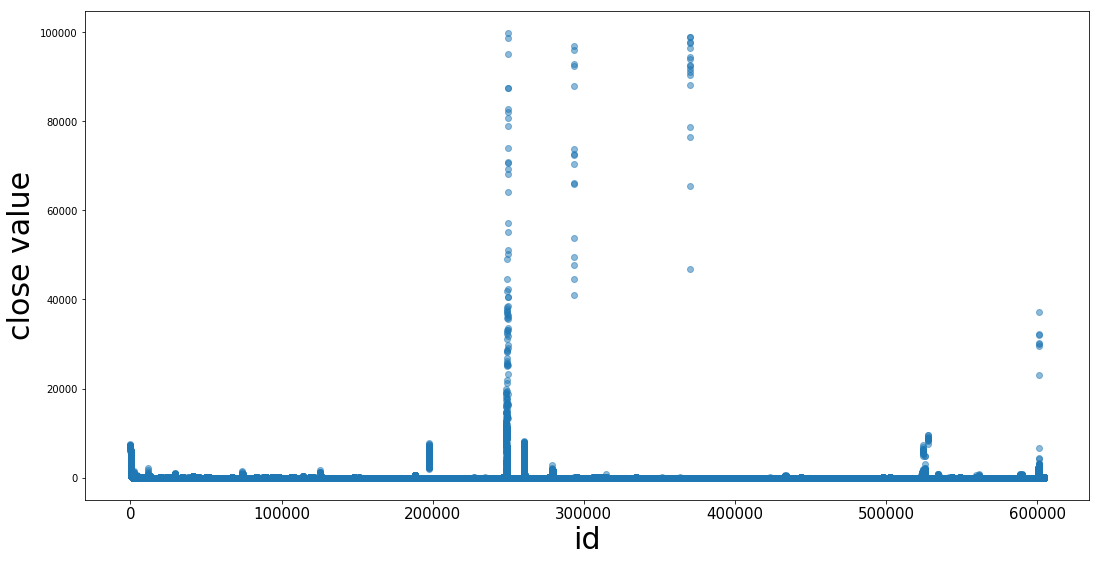

In [10]:
### Target variable exploration
x = range(len(target))
y = target
_ = plt.scatter(x,y,alpha=0.5);
plt.xlabel('id', fontsize=30)
plt.ylabel('close value', fontsize=30)
plt.show()

In [11]:
### split date
import datetime as dt
time_format = '%Y-%m-%d'

def split_date(data):
    data_time = pd.to_datetime(data.Date, format=time_format)
    data['Year']= data_time.dt.year
    data['Month'] = data_time.dt.month
    data['DayOfYear'] = data_time.dt.dayofyear
    data['DayOfMonth'] = data_time.dt.day
    
    return data

data = split_date(data)

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


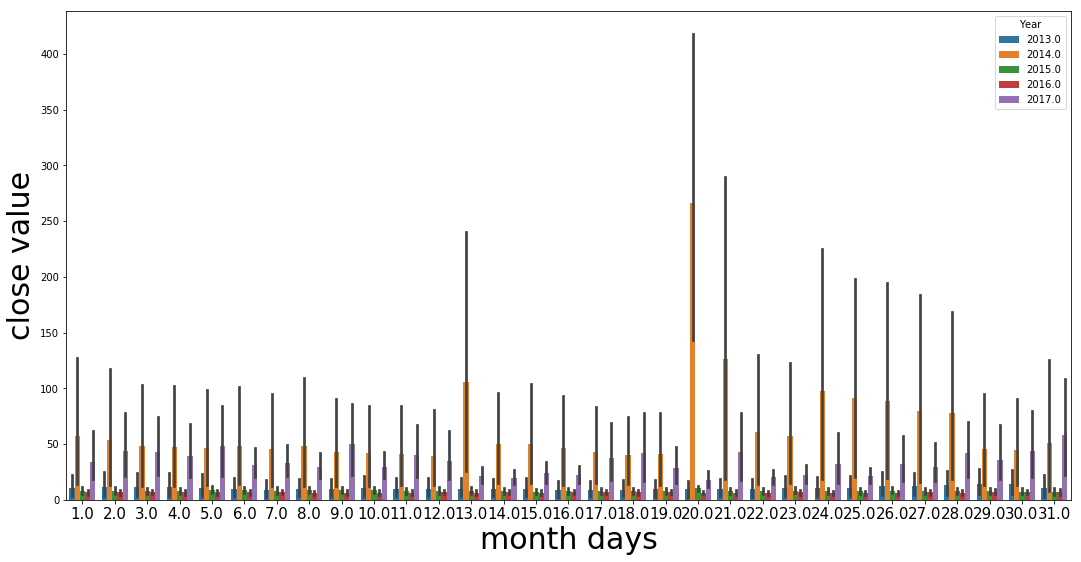

In [12]:
_ = sns.barplot(x='DayOfMonth', y='Close', data=data, hue='Year')
plt.xlabel('month days', fontsize=30)
plt.ylabel('close value', fontsize=30)
plt.show()

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


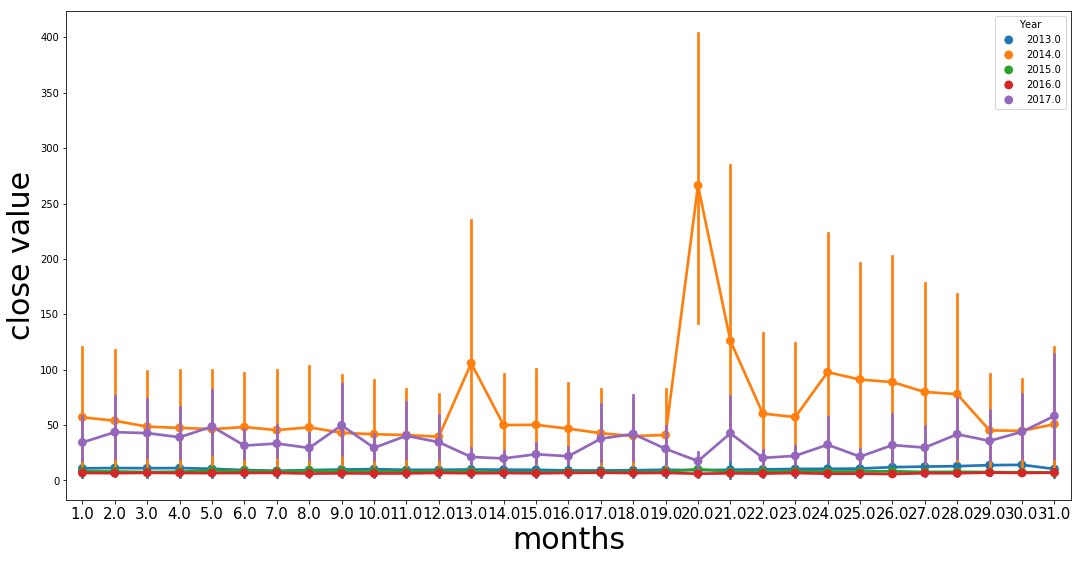

In [13]:
_ = sns.pointplot(x='DayOfMonth', y='Close',hue="Year", data=data)
plt.xlabel('months', fontsize=30)
plt.ylabel('close value', fontsize=30)
plt.show()

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


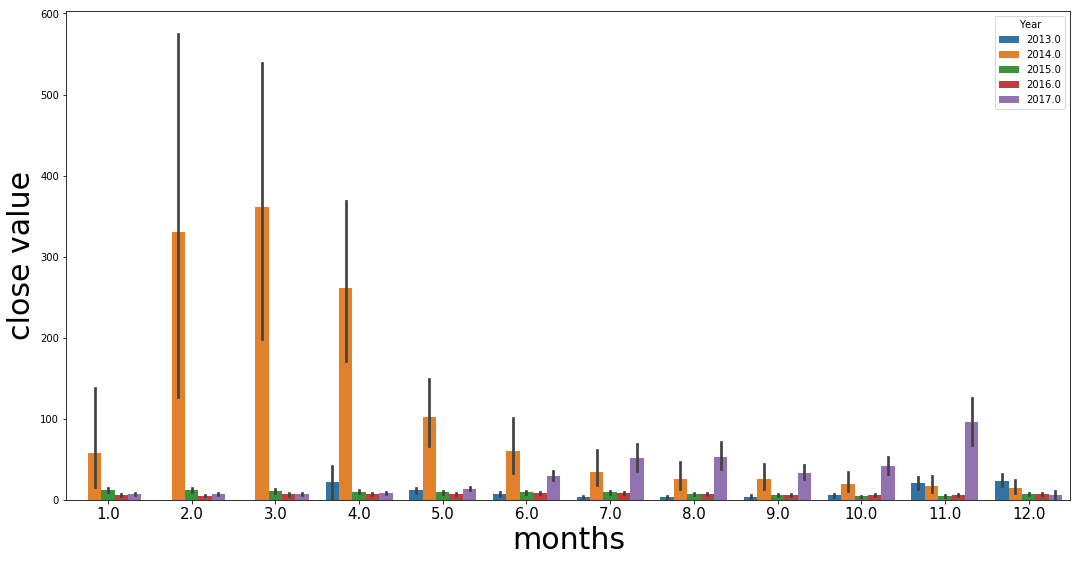

In [14]:
_ = sns.barplot(x='Month', y='Close', data=data, hue='Year')
plt.xlabel('months', fontsize=30)
plt.ylabel('close value', fontsize=30)
plt.show()

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


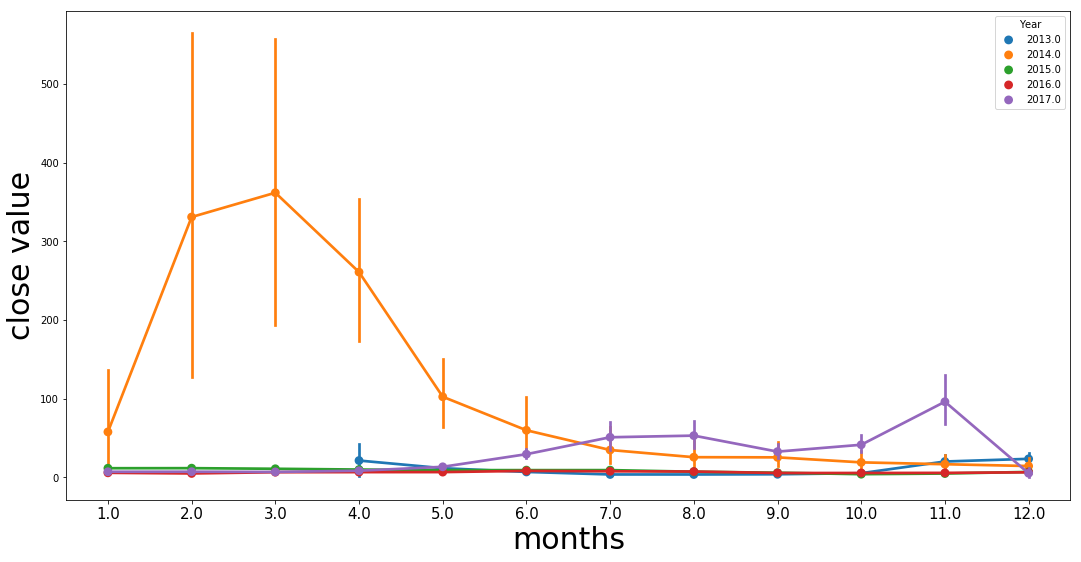

In [15]:
_ = sns.pointplot(x='Month', y='Close',hue="Year", data=data)
plt.xlabel('months', fontsize=30)
plt.ylabel('close value', fontsize=30)
plt.show()

## I know it is not a prediction problem, but as a tutorial, let's try to have some fun

In [16]:
from sklearn.cross_validation import train_test_split
import xgboost as xgb

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
df_train = data.drop(['id','Date'], axis=1)
df_train.head()

,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Year,Month,DayOfYear,DayOfMonth
0,6295.45,6625.05,5519.01,5950.07,"8,957,350,000","104,980,000,000",BTC,-0.054862,2017.0,11.0,316.0,12.0
1,6618.61,6873.15,6204.22,6357.60,"4,908,680,000","110,362,000,000",BTC,-0.039436,2017.0,11.0,315.0,11.0
2,7173.73,7312.00,6436.87,6618.14,"5,208,250,000","119,607,000,000",BTC,-0.077448,2017.0,11.0,314.0,10.0
3,7446.83,7446.83,7101.52,7143.58,"3,226,250,000","124,146,000,000",BTC,-0.040722,2017.0,11.0,313.0,9.0
4,7141.38,7776.42,7114.02,7459.69,"4,602,200,000","119,041,000,000",BTC,0.044573,2017.0,11.0,312.0,8.0


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604174 entries, 0 to 604173
Data columns (total 12 columns):
Open          603885 non-null float64
High          603868 non-null float64
Low           603913 non-null float64
Close         603887 non-null float64
Volume        604174 non-null object
Market.Cap    604174 non-null object
coin          604174 non-null object
Delta         603871 non-null float64
Year          604172 non-null float64
Month         604172 non-null float64
DayOfYear     604172 non-null float64
DayOfMonth    604172 non-null float64
dtypes: float64(9), object(3)
memory usage: 79.9+ MB


In [19]:
df_train['Volume'] = df_train['Volume'].apply(lambda x: x.replace(',',''))
df_train['Volume'] = df_train['Volume'].apply(lambda x: x.replace('0000',''))
df_train['Market.Cap'] = df_train['Market.Cap'].apply(lambda x: x.replace(',',''))
df_train['Market.Cap'] = df_train['Market.Cap'].apply(lambda x: x.replace('000000',''))

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604174 entries, 0 to 604173
Data columns (total 12 columns):
Open          603885 non-null float64
High          603868 non-null float64
Low           603913 non-null float64
Close         603887 non-null float64
Volume        604174 non-null object
Market.Cap    604174 non-null object
coin          604174 non-null object
Delta         603871 non-null float64
Year          604172 non-null float64
Month         604172 non-null float64
DayOfYear     604172 non-null float64
DayOfMonth    604172 non-null float64
dtypes: float64(9), object(3)
memory usage: 79.9+ MB


In [21]:
df_train.head(10)

,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Year,Month,DayOfYear,DayOfMonth
0,6295.45,6625.05,5519.01,5950.07,895735,104980,BTC,-0.054862,2017.0,11.0,316.0,12.0
1,6618.61,6873.15,6204.22,6357.60,490868,110362,BTC,-0.039436,2017.0,11.0,315.0,11.0
2,7173.73,7312.00,6436.87,6618.14,520825,119607,BTC,-0.077448,2017.0,11.0,314.0,10.0
3,7446.83,7446.83,7101.52,7143.58,322625,124146,BTC,-0.040722,2017.0,11.0,313.0,9.0
4,7141.38,7776.42,7114.02,7459.69,460220,119041,BTC,0.044573,2017.0,11.0,312.0,8.0
5,7023.10,7253.32,7023.10,7144.38,232634,117056,BTC,0.017269,2017.0,11.0,311.0,7.0
6,7403.22,7445.77,7007.31,7022.76,311190,123379,BTC,-0.051391,2017.0,11.0,310.0,6.0
7,7404.52,7617.48,7333.19,7407.41,238041,123388,BTC,0.000390,2017.0,11.0,309.0,5.0
8,7164.48,7492.86,7031.28,7379.95,248380,119376,BTC,0.030075,2017.0,11.0,308.0,4.0
9,7087.53,7461.29,7002.94,7207.76,336986,118084,BTC,0.016964,2017.0,11.0,307.0,3.0


In [22]:
df_train['Volume'] = df_train['Volume'].convert_objects(convert_numeric=True)
df_train['Market.Cap'] = df_train['Market.Cap'].convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['coin'] = le.fit_transform(df_train['coin'])

In [24]:
features = df_train.columns.tolist() 
features.remove('Close')

train = df_train

train.head(5)

X_train, X_valid = train_test_split(train, test_size=0.2, random_state=42)
y_train = (X_train.Close)
y_valid = (X_valid.Close)
dtrain = xgb.DMatrix(X_train[features], y_train)
dvalid = xgb.DMatrix(X_valid[features], y_valid)

In [25]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [26]:
num_boost_round = 20 # 5000

params = {'objective': 'reg:linear',
          'min_child_weight': 1, 
          'booster' : 'gbtree',
          'eta': 0.001,
          'alpha': 0,
          'gamma': 0,
          'max_depth': 8,
          'subsample': 0.9,
          'colsample_bytree': 0.9,
          'silent': 1,
          'seed': 1301,
          'tree_method': 'gpu_hist',
          'max_bin': 1000
          }

gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=2000,  
  verbose_eval=True)

[0]	train-rmse:nan	eval-rmse:nan
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 2000 rounds.
[1]	train-rmse:nan	eval-rmse:nan
[2]	train-rmse:nan	eval-rmse:nan
[3]	train-rmse:nan	eval-rmse:nan
[4]	train-rmse:nan	eval-rmse:nan
[5]	train-rmse:nan	eval-rmse:nan
[6]	train-rmse:nan	eval-rmse:nan
[7]	train-rmse:nan	eval-rmse:nan
[8]	train-rmse:nan	eval-rmse:nan
[9]	train-rmse:nan	eval-rmse:nan
[10]	train-rmse:nan	eval-rmse:nan
[11]	train-rmse:nan	eval-rmse:nan
[12]	train-rmse:nan	eval-rmse:nan
[13]	train-rmse:nan	eval-rmse:nan
[14]	train-rmse:nan	eval-rmse:nan
[15]	train-rmse:nan	eval-rmse:nan
[16]	train-rmse:nan	eval-rmse:nan
[17]	train-rmse:nan	eval-rmse:nan
[18]	train-rmse:nan	eval-rmse:nan
[19]	train-rmse:nan	eval-rmse:nan


,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Year,Month,DayOfYear,DayOfMonth
38474,0.001001,0.001112,0.000946,0.001040,651512.0,8112380.0,318,0.038961,2017.0,5.0,123.0,3.0
310900,0.000009,0.000009,0.000009,0.000009,148.0,858336.0,567,0.000000,2015.0,8.0,228.0,16.0
9464,0.001619,0.001750,0.001607,0.001647,123362.0,14574400.0,1182,0.017295,2016.0,4.0,111.0,20.0
50449,0.529962,0.662203,0.505016,0.638347,615634.0,41374600.0,912,0.204515,2017.0,4.0,120.0,30.0
409304,0.000094,0.000095,0.000093,0.000094,0.0,135.0,105,0.000000,2015.0,8.0,243.0,31.0
474399,0.002265,0.002615,0.001337,0.001341,73.0,3380.0,62,-0.407947,2015.0,7.0,210.0,29.0
495691,0.000063,0.000064,0.000063,0.000064,0.0,1894.0,651,0.015873,2017.0,1.0,21.0,21.0
364712,0.004694,0.004903,0.003358,0.004812,222.0,134859.0,458,0.025138,2017.0,9.0,248.0,5.0
67715,0.070529,0.075052,0.070529,0.073376,16966.0,6034340.0,4,0.040366,2017.0,1.0,20.0,20.0
332513,0.001471,0.001478,0.001464,0.001476,2.0,35725.0,616,0.003399,2016.0,11.0,332.0,27.0
